In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sales
0,490024,20718,RED SPOTTY SHOPPER BAG,1,2009-12-03 12:40:00.000,1.25,14606,United Kingdom,1.25
1,490024,90214J,"LETTER ""J"" BLING KEY RING",1,2009-12-03 12:40:00.000,1.25,14606,United Kingdom,1.25
2,490024,90214C,"LETTER ""C"" BLING KEY RING",1,2009-12-03 12:40:00.000,1.25,14606,United Kingdom,1.25
3,490024,90214H,"LETTER ""H"" BLING KEY RING",1,2009-12-03 12:40:00.000,1.25,14606,United Kingdom,1.25
4,490024,90214D,"LETTER ""D"" BLING KEY RING",1,2009-12-03 12:40:00.000,1.25,14606,United Kingdom,1.25


In [43]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406309 entries, 0 to 406308
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406309 non-null  int64         
 1   StockCode    406309 non-null  object        
 2   Description  406309 non-null  object        
 3   Quantity     406309 non-null  int64         
 4   InvoiceDate  406309 non-null  datetime64[ns]
 5   Price        406309 non-null  float64       
 6   Customer ID  406309 non-null  int64         
 7   Country      406309 non-null  object        
 8   Total Sales  406309 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.9+ MB


In [45]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total Sales    0
dtype: int64

In [46]:
df.describe()

,Invoice,Quantity,InvoiceDate,Price,Customer ID,Total Sales
count,406309.000000,406309.000000,406309,406309.000000,406309.000000,406309.000000
mean,514761.143521,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268,21.346766
min,489434.000000,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,502764.000000,2.000000,2010-03-26 14:01:00,1.250000,14006.000000,4.950000
50%,515305.000000,5.000000,2010-07-09 15:48:00,1.950000,15326.000000,11.830000
75%,527104.000000,12.000000,2010-10-14 17:09:00,3.750000,16814.000000,19.500000
max,538171.000000,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000,15818.400000
std,14101.612357,96.998833,NaN,4.285951,1677.329470,69.148424


In [47]:
latest_date = df['InvoiceDate'].max()
aggregated_df=df.groupby('Customer ID',as_index=False).agg(
Monetary_Value=('Total Sales','sum'),
Frequency=('Invoice','nunique'),
 Recency=('InvoiceDate', lambda x: (latest_date - x.max()).days)
)

In [48]:
aggregated_df.head()

,Customer ID,Monetary_Value,Frequency,Recency
0,12346,169.36,2,164
1,12347,1323.32,2,2
2,12348,221.16,1,73
3,12349,2221.14,2,42
4,12351,300.93,1,10


In [49]:
aggregated_df.describe()

,Customer ID,Monetary_Value,Frequency,Recency
count,4285.000000,4285.000000,4285.000000,4285.000000
mean,15356.806768,2024.126801,4.426138,89.548191
std,1699.839258,8813.945538,7.938017,96.359872
min,12346.000000,1.550000,1.000000,0.000000
25%,13891.000000,307.560000,1.000000,17.000000
50%,15362.000000,702.900000,2.000000,51.000000
75%,16840.000000,1704.290000,5.000000,135.000000
max,18287.000000,349164.350000,183.000000,373.000000


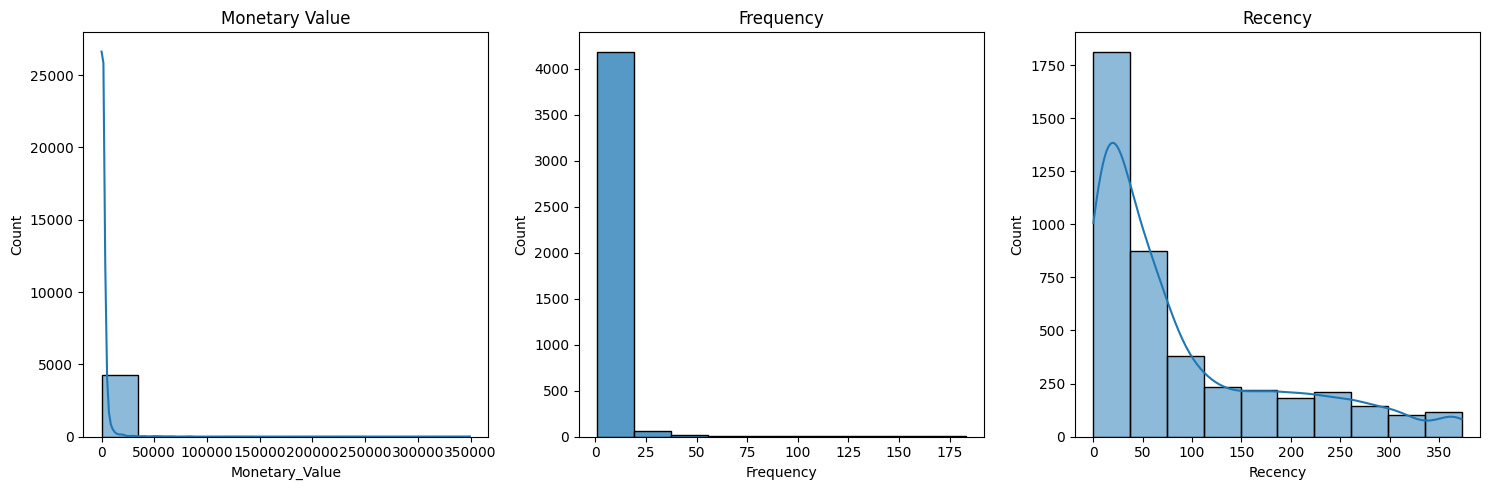

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=aggregated_df, x="Monetary_Value", bins=10, kde=True, ax=axes[0])
axes[0].set_title("Monetary Value")

sns.histplot(data=aggregated_df, x="Frequency", bins=10, kde=False, ax=axes[1])
axes[1].set_title("Frequency")

sns.histplot(data=aggregated_df, x="Recency", bins=10, kde=True, ax=axes[2])
axes[2].set_title("Recency")

plt.tight_layout()
plt.show()

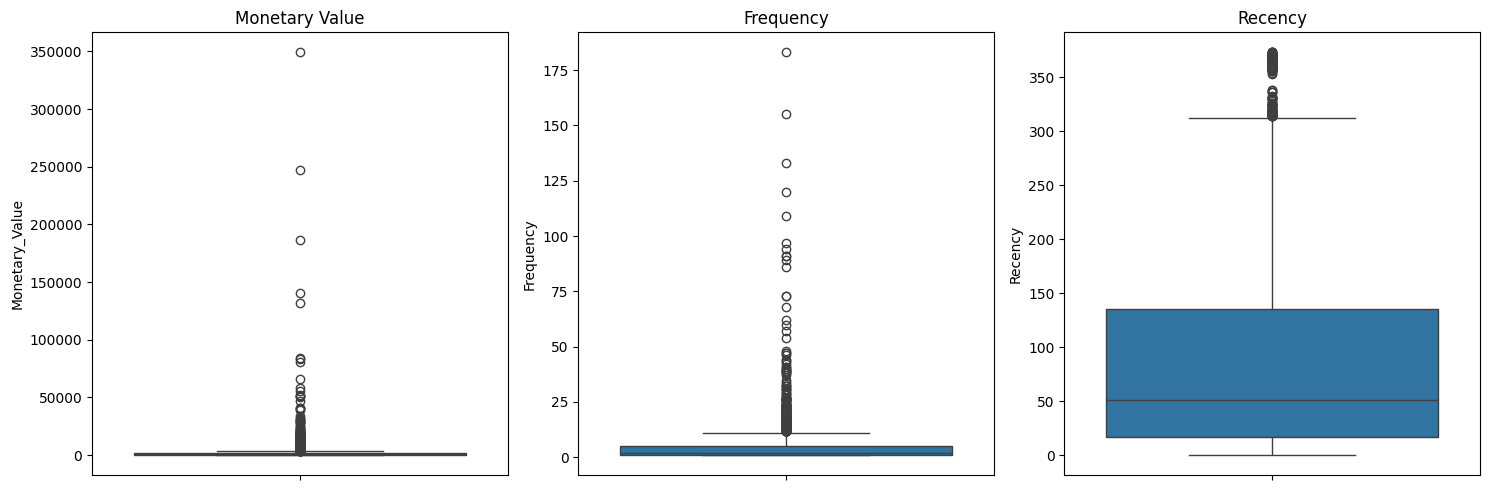

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=aggregated_df, y="Monetary_Value", ax=axes[0])
axes[0].set_title("Monetary Value")

sns.boxplot(data=aggregated_df, y="Frequency", ax=axes[1])
axes[1].set_title("Frequency")

sns.boxplot(data=aggregated_df, y="Recency", ax=axes[2])
axes[2].set_title("Recency")

plt.tight_layout()
plt.show()

In [52]:
M_Q1 = aggregated_df["Monetary_Value"].quantile(0.25)
M_Q3 = aggregated_df["Monetary_Value"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

M_lower = M_Q1 - 1.5 * M_IQR
M_upper = M_Q3 + 1.5 * M_IQR

monetary_outliers_df = aggregated_df[
    (aggregated_df["Monetary_Value"] < M_lower) | 
    (aggregated_df["Monetary_Value"] > M_upper)
].copy()


In [53]:
monetary_outliers_df.describe()

,Customer ID,Monetary_Value,Frequency,Recency
count,423.000000,423.000000,423.000000,423.000000
mean,15103.040189,12188.101740,17.167849,30.035461
std,1728.661406,25830.851045,19.729755,51.541004
min,12357.000000,3802.040000,1.000000,0.000000
25%,13622.000000,4605.940000,8.000000,3.000000
50%,14961.000000,6191.320000,12.000000,13.000000
75%,16692.000000,10273.235000,18.000000,31.000000
max,18260.000000,349164.350000,183.000000,364.000000


In [54]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

F_lower = F_Q1 - 1.5 * F_IQR
F_upper = F_Q3 + 1.5 * F_IQR

frequency_outliers_df = aggregated_df[
    (aggregated_df["Frequency"] < F_lower) | 
    (aggregated_df["Frequency"] > F_upper)
].copy()


In [55]:
frequency_outliers_df.describe()

,Customer ID,Monetary_Value,Frequency,Recency
count,279.000000,279.000000,279.000000,279.000000
mean,15352.655914,14409.714932,23.810036,16.089606
std,1748.429987,31381.736785,21.932937,26.589117
min,12437.000000,1094.390000,12.000000,0.000000
25%,13800.000000,4331.560500,13.000000,2.000000
50%,15465.000000,6615.770000,17.000000,7.000000
75%,16828.500000,11692.405000,23.000000,19.000000
max,18260.000000,349164.350000,183.000000,211.000000


In [56]:
non_outlier_df = aggregated_df[
    (aggregated_df["Monetary_Value"].between(M_lower, M_upper)) &
    (aggregated_df["Frequency"].between(F_lower, F_upper))
]

In [57]:
non_outlier_df.describe()

,Customer ID,Monetary_Value,Frequency,Recency
count,3809.000000,3809.000000,3809.000000,3809.000000
mean,15376.482804,885.502197,2.863481,97.082174
std,1693.199806,817.672283,2.243748,98.111495
min,12346.000000,1.550000,1.000000,0.000000
25%,13912.000000,279.910000,1.000000,22.000000
50%,15389.000000,588.050000,2.000000,58.000000
75%,16854.000000,1269.050000,4.000000,154.000000
max,18287.000000,3788.210000,11.000000,373.000000


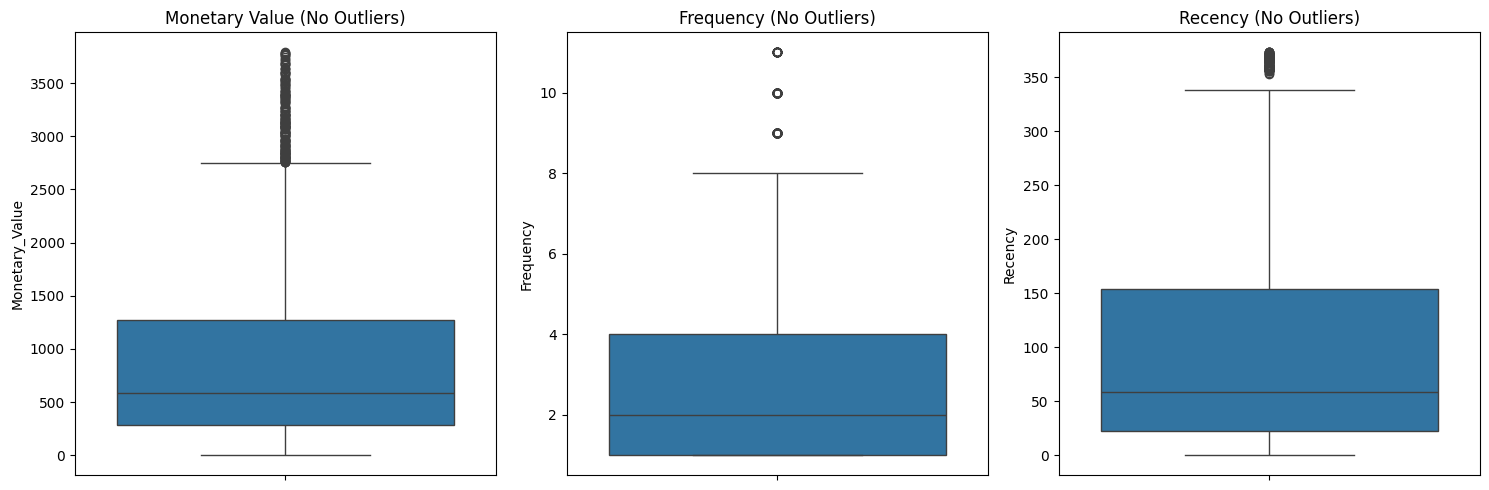

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=non_outlier_df, y="Monetary_Value", ax=axes[0])
axes[0].set_title("Monetary Value (No Outliers)")

sns.boxplot(data=non_outlier_df, y="Frequency", ax=axes[1])
axes[1].set_title("Frequency (No Outliers)")

sns.boxplot(data=non_outlier_df, y="Recency", ax=axes[2])
axes[2].set_title("Recency (No Outliers)")

plt.tight_layout()
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(non_outlier_df[['Recency','Frequency','Monetary_Value']])
scaled_data_df=pd.DataFrame(scaled_data,index=non_outlier_df.index,columns=['Recency','Frequency','Monetary_Value'])

In [60]:
scaled_data_df

,Recency,Frequency,Monetary_Value
0,0.682149,-0.384889,-0.875945
1,-0.969251,-0.384889,0.535514
2,-0.245489,-0.830631,-0.812586
3,-0.561498,-0.384889,1.633678
4,-0.887700,-0.830631,-0.715016
...,...,...,...
4280,-0.816344,1.398076,-0.298120
4281,-0.316846,-0.830631,-0.579553
4282,2.017539,-0.830631,-0.621972
4283,0.141876,-0.384889,0.441467


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [62]:
wcss=[]

for i in range(2,13):
    model=KMeans(n_clusters=i,random_state=42,max_iter=1000)
    model.fit(scaled_data_df)
    wcss.append(model.inertia_)

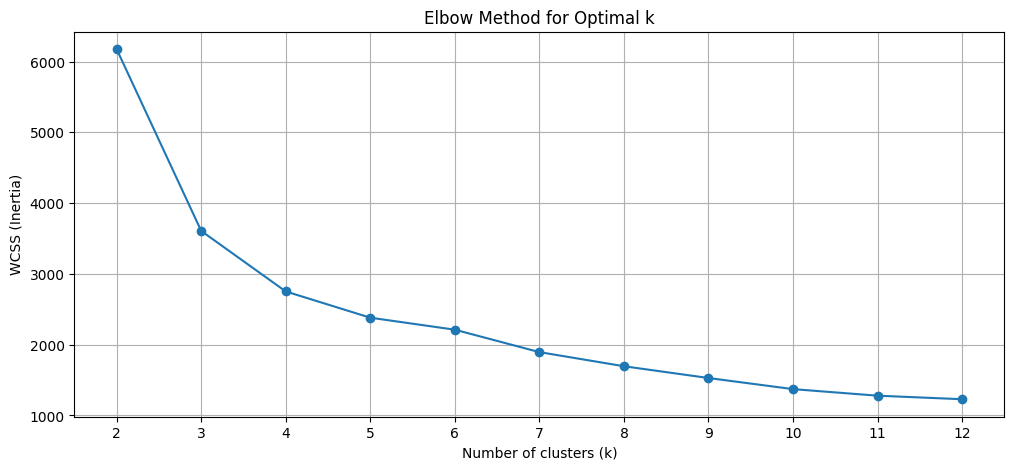

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(range(2, 13), wcss, marker='o', linestyle='-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.xticks(range(2,13))
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

Optimal number of clusters: 4


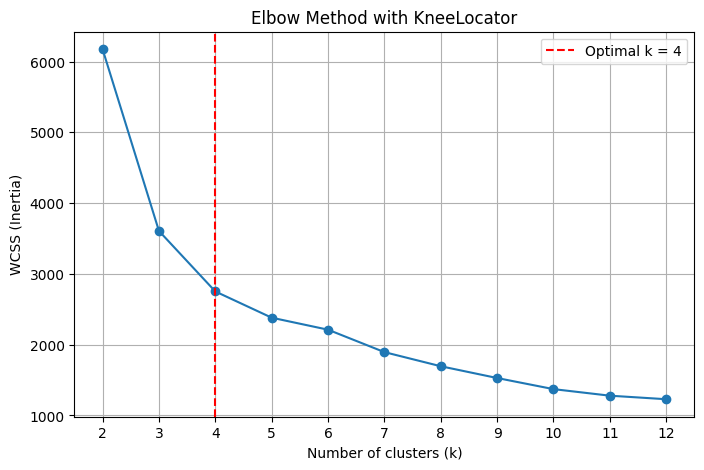

In [64]:
kl = KneeLocator(range(2, 13), wcss, curve="convex", direction="decreasing")

print("Optimal number of clusters:", kl.elbow)

# Plot Elbow Curve with KneeLocator
plt.figure(figsize=(8, 5))
plt.plot(range(2, 13), wcss, marker='o', linestyle='-')
plt.axvline(kl.elbow, color='red', linestyle='--', label=f"Optimal k = {kl.elbow}")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method with KneeLocator")
plt.legend()
plt.grid(True)
plt.xticks(range(2,13))
plt.show()

In [65]:
silhouette_scores = []
for k in range(2,13):
    model = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    labels = model.fit_predict(scaled_data_df)
    silhouette_scores.append(silhouette_score(scaled_data_df, labels))

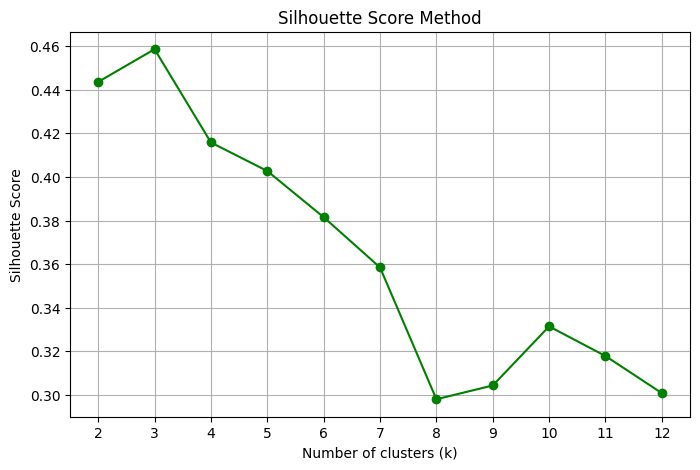

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(range(2,13), silhouette_scores, marker='o', color='green')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.title("Silhouette Score Method")
plt.xticks(range(2,13))
plt.show()

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [68]:
df_cluster = non_outlier_df.copy() 
features = ["Recency", "Frequency", "Monetary_Value"]
X = df_cluster[features]

In [69]:
scaler_ct = ColumnTransformer(
    transformers=[("num", StandardScaler(), features)],
    remainder="drop"
)
pipeline = Pipeline([
    ("scaler", scaler_ct),
    ("kmeans", KMeans(n_clusters=4, random_state=42, max_iter=1000))
])
pipeline.fit(X)

,steps,"[('scaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
df_cluster["Cluster"] = pipeline.named_steps["kmeans"].labels_.astype(int)

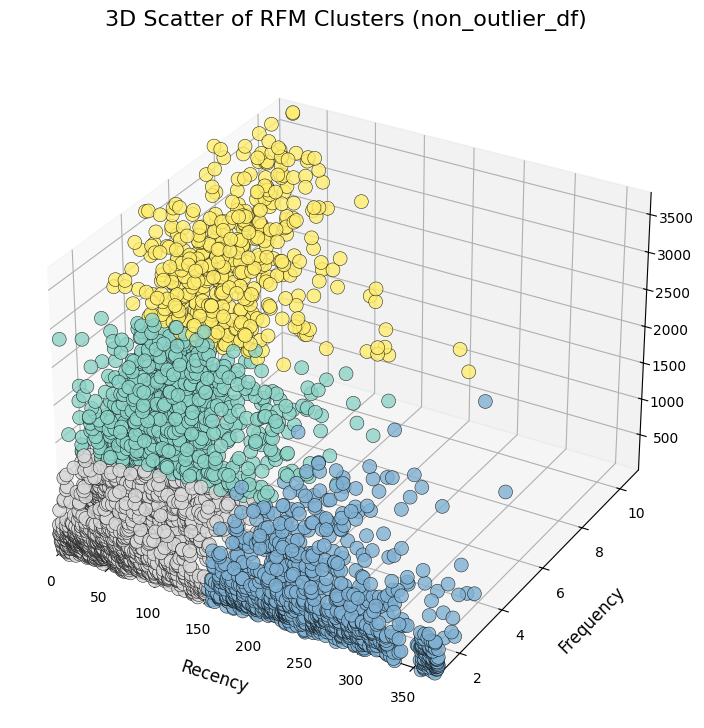

In [71]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection="3d")


scatter = ax.scatter(
    df_cluster["Recency"],
    df_cluster["Frequency"],
    df_cluster["Monetary_Value"],
    c=df_cluster["Cluster"],
    cmap="Set3",
    s=100,
    alpha=0.8,
    edgecolor="k",
    linewidth=0.4
)

ax.set_xlabel("Recency", fontsize=12, labelpad=12)
ax.set_ylabel("Frequency", fontsize=12, labelpad=12)
ax.set_zlabel("Monetary Value", fontsize=12, labelpad=12)
ax.set_title("3D Scatter of RFM Clusters (non_outlier_df)", fontsize=16, pad=15)

# axis limits so nothing is cut off
ax.set_xlim(df_cluster["Recency"].min(), df_cluster["Recency"].max())
ax.set_ylim(df_cluster["Frequency"].min(), df_cluster["Frequency"].max())
ax.set_zlim(df_cluster["Monetary_Value"].min(), df_cluster["Monetary_Value"].max())

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper left", bbox_to_anchor=(1.05, 1))
ax.add_artist(legend1)
plt.tight_layout()
plt.show()

## Customer Segmentation Analysis  

This analysis identifies distinct customer groups based on their behavior using **Recency, Frequency, and Monetary (RFM)** metrics.  

---

#### 🟡 Cluster 3: High-Value / VIPs (Summary: **Loyalists**)  
**Behavior:** High Monetary Value, High Frequency, Low Recency.  
**Insight:** Our most valuable and loyal customers. They buy often, spend the most, and purchase recently.  

---

#### 🟢 Cluster 2: Active & Frequent (Summary: **Regulars**)  
**Behavior:** High Frequency, Medium Monetary Value, Medium Recency.  
**Insight:** Provide a steady revenue stream. Reliable and consistent shoppers.  

---

#### ⚪ Cluster 0: New Customers (Summary: **Starters**)  
**Behavior:** Very low Recency, Frequency, and Monetary Value.  
**Insight:** Recently acquired customers with small, single purchases. Opportunity for growth and retention.  

---

#### 🔵 Cluster 1: At-Risk / Lapsed (Summary: **Dormant**)  
**Behavior:** Very high Recency, Low Frequency, Low Monetary Value.  
**Insight:** At risk of churn or already lapsed. Re-engagement strategies may help, but profitability is low.  


In [72]:
df_cluster.head()

,Customer ID,Monetary_Value,Frequency,Recency,Cluster
0,12346,169.36,2,164,1
1,12347,1323.32,2,2,0
2,12348,221.16,1,73,2
3,12349,2221.14,2,42,0
4,12351,300.93,1,10,2


In [73]:
overlap_indices=monetary_outliers_df.index.intersection(frequency_outliers_df.index)
monetary_only_outliers=monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers=frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers=monetary_outliers_df.loc[overlap_indices]

In [74]:
monetary_only_outliers['Cluster']=-1
frequency_only_outliers['Cluster']=-2
monetary_and_frequency_outliers['Cluster']=-3

df_cluster_with_outliers=pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency_outliers])

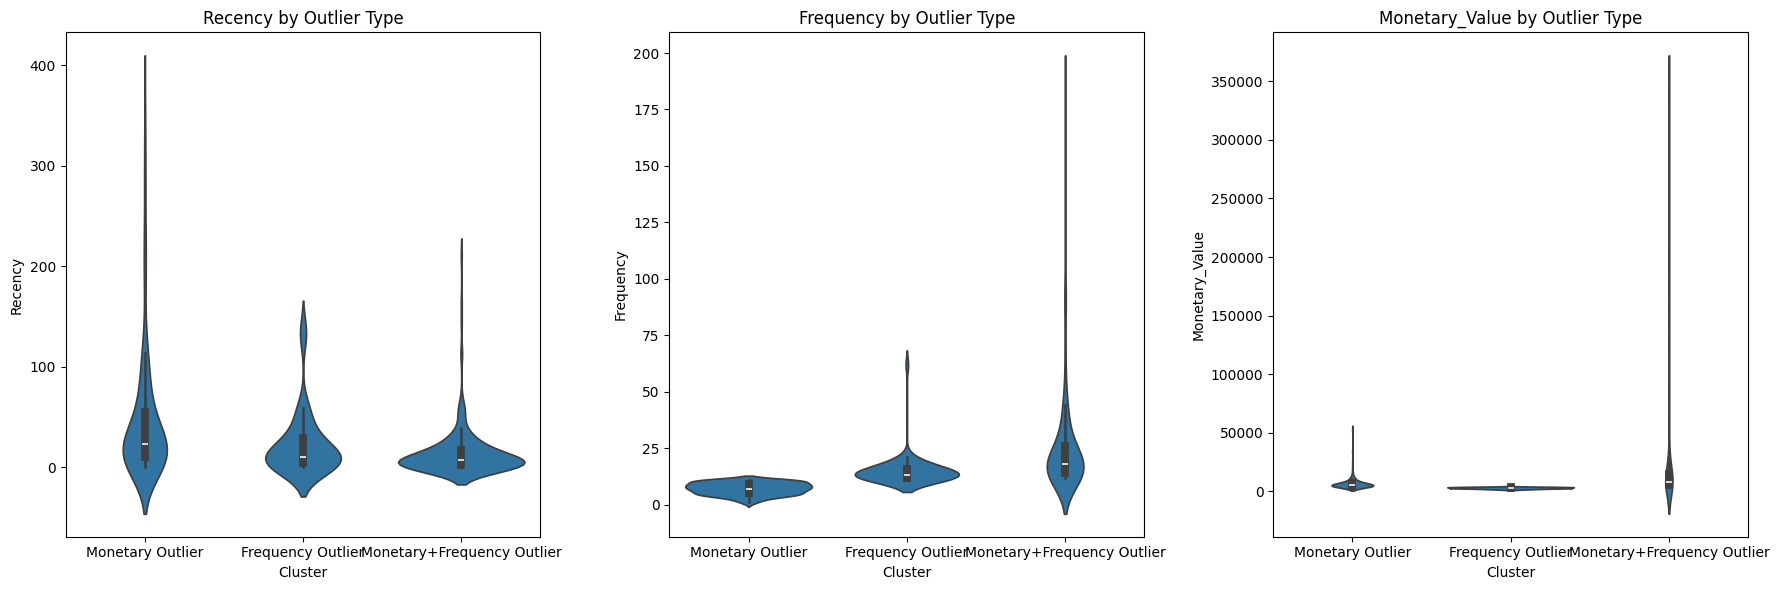

In [75]:
cluster_labels = {
    "-1": "Monetary Outlier",
    "-2": "Frequency Outlier",
    "-3": "Monetary+Frequency Outlier"
}

df_outliers = df_cluster_with_outliers.copy()
df_outliers["Cluster"] = df_outliers["Cluster"].astype(str).replace(cluster_labels)

# Features to plot
features = ["Recency", "Frequency", "Monetary_Value"]

plt.figure(figsize=(18, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(
        x="Cluster", 
        y=feature, 
        data=df_outliers,
        inner="box"
    )
    plt.title(f"{feature} by Outlier Type", fontsize=12)

plt.tight_layout()
plt.show()

## Insights from Outlier Groups (Violin Plots)

The violin plots provide a **full picture of customer behavior** across the outlier groups.  
Instead of just showing averages, they reveal the **distribution of customers** within each group.  
This helps us understand not only the "typical" behavior but also the **extremes that define the outliers**.

---

### 🟡 Monetary Outlier Group (Big Spenders)
- **Recency:** Most have made **very recent purchases** → these are not old customers but *new big spenders*.  
- **Frequency:** Generally **low frequency** → they buy rarely, but when they do, it’s significant.  
  - A small fraction shows very high frequency, but this is not common.  
- **Monetary Value:** Most spend little, but a **long tail** extends to *extremely high spending*.  
  - This means a few **exceptionally valuable customers** drive this group.  

**👉 Interpretation:** These are **big spenders who purchase occasionally**. They can be nurtured into loyal repeat buyers.  

---

#### 🟢 Frequency Outlier Group (Super Actives, Low Value)
- **Recency:** Purchases are **very recent** → they are highly active.  
- **Frequency:** As expected, they show **very high purchase frequency**.  
- **Monetary Value:** Spending per purchase is **very low**, with no long tail.  

**👉 Interpretation:** These are **very active shoppers** but **low spenders**. They provide regular traffic but limited revenue.  

---

#### 🔵 Monetary & Frequency Outlier Group (Elite Customers)
- **Recency:** Purchases are **very recent** → they are actively engaged.  
- **Frequency:** They buy **frequently**, showing consistent activity.  
- **Monetary Value:** Similar to the monetary outliers, most spend modestly, but a **long tail of extremely high spenders** makes them highly valuable.  

**👉 Interpretation:** This is the **most desirable group** → **frequent buyers + big spenders**. They are true VIP customers.  

---

### 🎯 Key Takeaways for Stakeholders
- **Monetary Outliers:** Big spenders, but not frequent → opportunity to increase repeat purchases.  
- **Frequency Outliers:** Frequent buyers, but low spenders → can be encouraged to spend more.  
- **Both Outliers:** The ideal segment → loyal, frequent, and high-value customers.  


In [76]:
cluster_mapping = {
    0: "Starters",
    1: "Dormant",
    2: "Regulars",
    3: "Loyalists",
    -1: "Big-Spenders",
    -2: "Super-Actives",
    -3: "VIP-Elite"
}

full_clustering_df=pd.concat([df_cluster,df_cluster_with_outliers])

In [77]:
full_clustering_df['Label']=full_clustering_df['Cluster'].map(cluster_mapping)

In [78]:
full_clustering_df

,Customer ID,Monetary_Value,Frequency,Recency,Cluster,Label
0,12346,169.36,2,164,1,Dormant
1,12347,1323.32,2,2,0,Starters
2,12348,221.16,1,73,2,Regulars
3,12349,2221.14,2,42,0,Starters
4,12351,300.93,1,10,2,Regulars
...,...,...,...,...,...,...
4235,18223,7516.31,12,22,-3,VIP-Elite
4236,18225,7545.14,15,0,-3,VIP-Elite
4237,18226,6650.83,15,13,-3,VIP-Elite
4241,18231,4791.80,23,41,-3,VIP-Elite


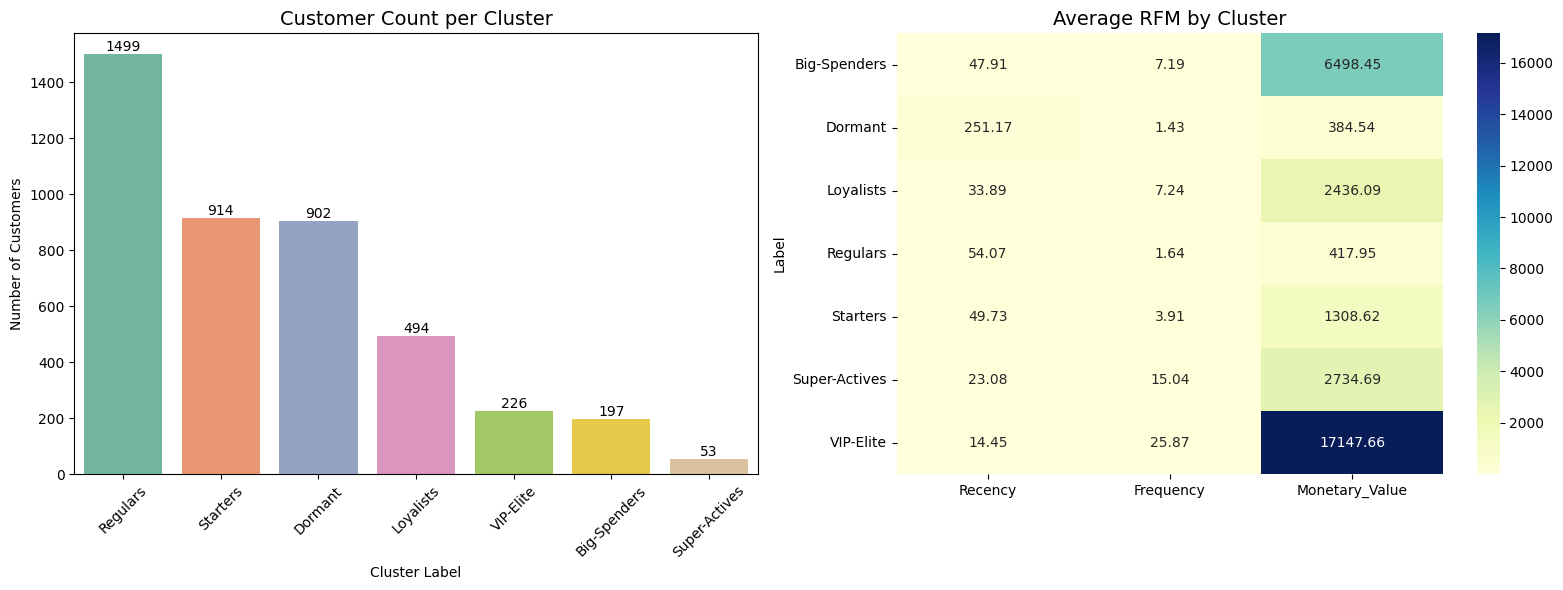

In [79]:
# Cluster counts
cluster_counts = full_clustering_df["Label"].value_counts()

# Cluster summary (averages)
cluster_summary = (
    full_clustering_df
    .groupby("Label")[["Recency", "Frequency", "Monetary_Value"]]
    .mean()
    .round(2)
)

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Bar Chart: Cluster Counts
bar=sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    hue=cluster_counts.index,   # use same variable as hue
    palette="Set2",
    dodge=False,
    legend=False,
    ax=axes[0]
)
for container in bar.containers:
    bar.bar_label(container)
axes[0].set_title("Customer Count per Cluster", fontsize=14)
axes[0].set_ylabel("Number of Customers")
axes[0].set_xlabel("Cluster Label")
axes[0].tick_params(axis='x', rotation=45)

# 2. Heatmap: Cluster Averages
sns.heatmap(
    cluster_summary,
    annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,
    ax=axes[1]
)
axes[1].set_title("Average RFM by Cluster", fontsize=14)

plt.tight_layout()
plt.show()

In [80]:
full_clustering_df.to_csv('final_df')